# Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [41]:
TOKEN_SPAM_PROB_FILE = "SpamData/03_Testing/prob_spam.txt"
TOKEN_HAM_PROB_FILE = "SpamData/03_Testing/prob_nonspam.txt"
TOKEN_ALL_PROB_FILE = "SpamData/03_Testing/prob_all_token.txt"

TEST_FEATURE_MATRIX = "SpamData/03_Testing/test-features.txt"
TEST_TARGET_FILE = "SpamData/03_Testing/test-target.txt"

VOCAB_SIZE = 2500

# Load the Data

In [42]:
#Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
#Target
Y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [43]:
a = np.array([1 , 2 , 3])
b = np.array([0 , 5 , 6])
a.dot(b)

28

In [44]:
c = np.array([[3, 2], [4, 5], [9, 2]])
print('Shape of c array:', c.shape)
print(c)

Shape of c array: (3, 2)
[[3 2]
 [4 5]
 [9 2]]


In [45]:
print('a dot c', a.dot(c))
print('shape of a dot c', a.dot(c).shape)

a dot c [38 18]
shape of a dot c (2,)


In [46]:
#X_test.dot(prob_token_spam)
print(X_test.shape)
print(prob_token_spam.shape)

(1724, 2500)
(2500,)


In [47]:
print('Shape of the dot product is:', X_test.dot(prob_token_spam).shape)

Shape of the dot product is: (1724,)


# Set the Prior

## $$P(Spam \, | \, X) = \frac{P(X \, | \, Spam)\, P(Spam)}{P(X)}$$ 

In [48]:
PROB_SPAM = 0.3109

In [49]:
prob_token_spam

array([1.21858467e-02, 5.22889707e-03, 6.80595479e-03, ...,
       2.23696131e-05, 3.35544197e-05, 5.59240328e-06])

In [50]:
np.log(prob_token_spam)

array([ -4.4074801 ,  -5.25355491,  -4.98995735, ..., -10.70780708,
       -10.30234197, -12.09410144])

## Joint probability in log format

In [51]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_token_all)) + np.log(PROB_SPAM)

## $$P(Ham \, | \, X) = \frac{P(X \, | \, Ham)\, P(1 - Spam)}{P(X)}$$ 

In [52]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_token_all)) + np.log(1 - PROB_SPAM)

# Making Predictions

### Checking for higher joint probabilty

$$P(Spam \, | \, X) > P(Ham \, | \,X)$$
<br>
$$OR$$
<br>
$$P(Spam \, | \, X) < P(Ham \, | \,X)$$

In [53]:
prediction = joint_log_spam > joint_log_ham

In [54]:
prediction[-5:]

array([ True, False, False, False, False])

In [55]:
Y_test[-5:]

array([0., 0., 0., 0., 0.])

## Smplify

### $$P(X \, | \, Spam)\, P(Spam) \neq \frac{P(X \, | \, Spam)\, P(Spam)}{P(X)}$$

In [56]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

# Metrics & Evaluation

## Accuracy

In [57]:
correct_doc = (Y_test == prediction).sum()

In [58]:
correct_doc

1685

In [59]:
wrong_doc = (Y_test != prediction).sum()

In [60]:
wrong_doc

39

In [61]:
# Accuracy
accuracy = round(correct_doc/len(X_test), 3)
print('Accuracy:{:.2%}'.format(accuracy))

Accuracy:97.70%


In [62]:
frac_wrong = round(wrong_doc/len(X_test), 3)
print('Fraction classified incorrectly is:{:.2%}'.format(frac_wrong))

Fraction classified incorrectly is:2.30%


# Visualizing the Results

In [63]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | NonSpam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

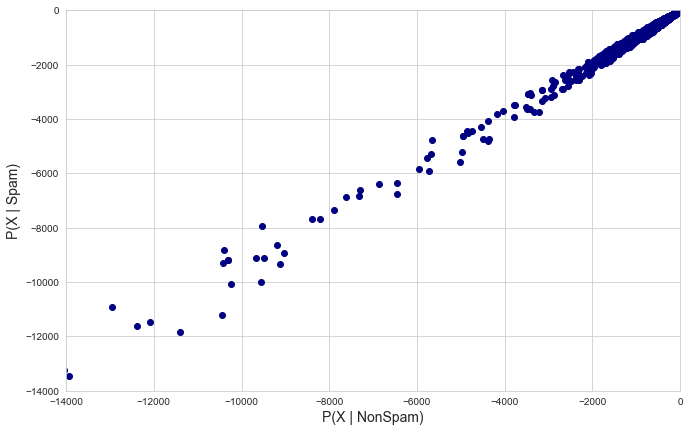

In [64]:
plt.figure(figsize=(11, 7))
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.scatter(joint_log_ham, joint_log_spam, c='navy')
plt.show()

# Decision Boundry

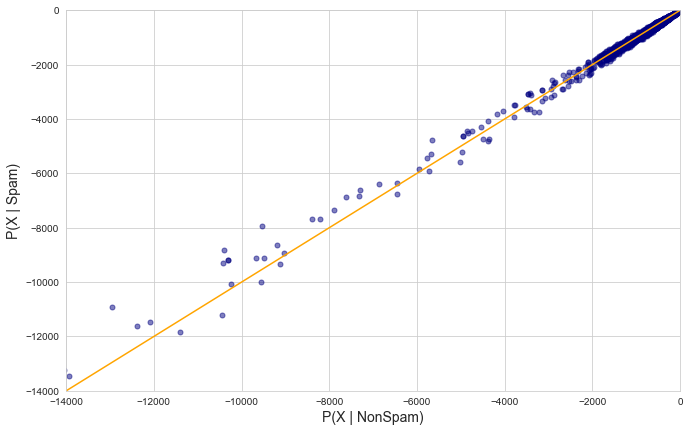

In [65]:
plt.figure(figsize=(11, 7))

plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.scatter(joint_log_ham, joint_log_spam, c='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

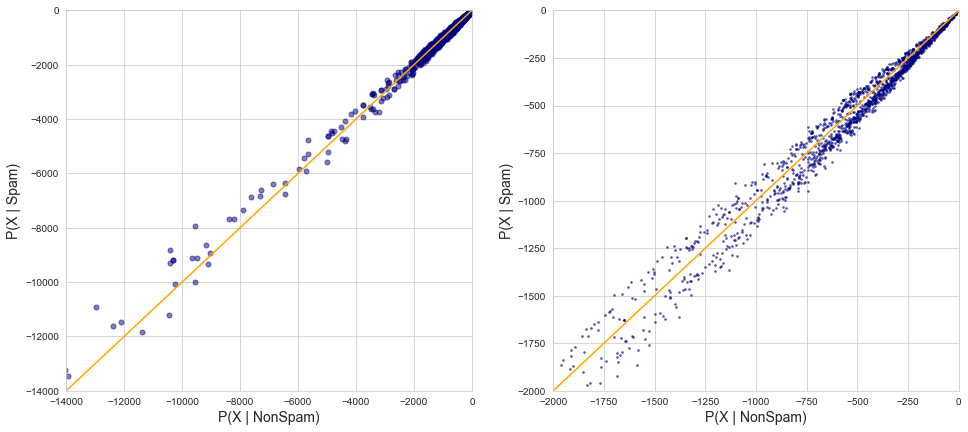

In [66]:
plt.figure(figsize=(16, 7))

# Chart-1
plt.subplot(1, 2, 1)

plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.scatter(joint_log_ham, joint_log_spam, c='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

#Chart-2
plt.subplot(1, 2, 2)
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.scatter(joint_log_ham, joint_log_spam, c='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')


plt.show()

In [67]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label:joint_log_spam,
                           xaxis_label:joint_log_ham,
                           labels:Y_test})

In [68]:
summary_df

,P(X | Spam),P(X | NonSpam),Actual Category
0,-1220.357165,-1305.652727,1.0
1,-262.914379,-276.094925,1.0
2,-411.409647,-469.983840,1.0
3,-1473.128371,-1550.070441,1.0
4,-1240.047857,-1314.392442,1.0
...,...,...,...
1719,-1997.337067,-2109.369585,0.0
1720,-875.874049,-787.130871,0.0
1721,-4803.130360,-4367.649800,0.0
1722,-200.682945,-190.844976,0.0


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


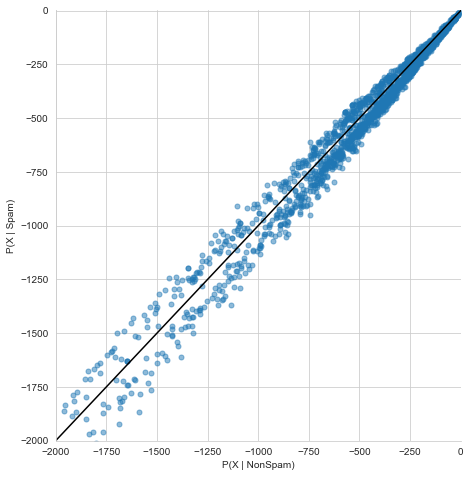

In [69]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5,
           fit_reg=False, scatter_kws={'alpha':0.5, 's':25})
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])
plt.plot(linedata, linedata, color='black')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


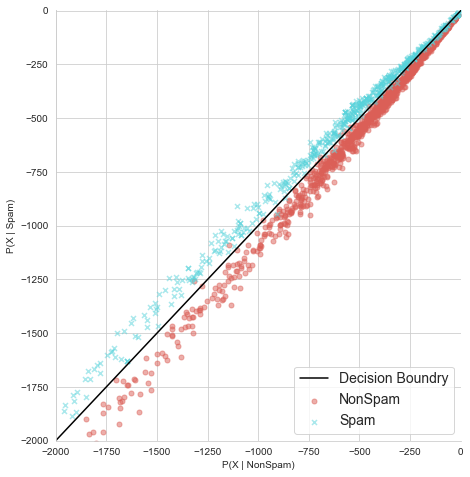

In [70]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5,
           fit_reg=False, scatter_kws={'alpha':0.5, 's':25},
           hue=labels, markers=['o', 'x'], palette='hls', legend=False)
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])
plt.plot(linedata, linedata, color='black')
plt.legend(('Decision Boundry', 'NonSpam', 'Spam'), loc='lower right', fontsize=14)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


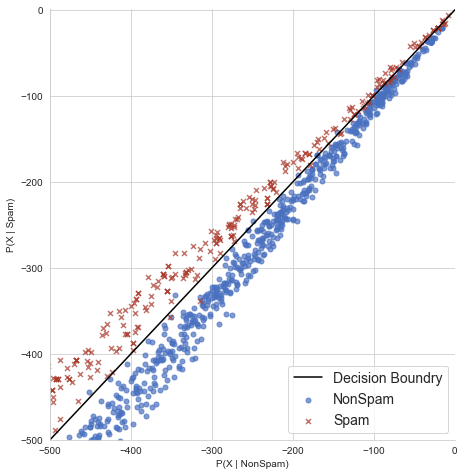

In [71]:
my_colors = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label,
           data=summary_df, size=6.5,
           fit_reg=False,
           scatter_kws={'alpha':0.7, 's':25},
           hue=labels, markers=['o', 'x'],
           palette=my_colors, legend=False)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')
plt.legend(('Decision Boundry', 'NonSpam', 'Spam'), loc='lower right', fontsize=14)
plt.show()

## False Positives & False Negatives

In [72]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [73]:
true_pos = (Y_test == 1) & (prediction == 1)
true_pos

array([ True,  True,  True, ..., False, False, False])

In [74]:
true_pos.sum()

569

In [75]:
false_pos = (Y_test == 0) & (prediction == 1)
false_pos

array([False, False, False, ..., False, False, False])

In [76]:
false_pos.sum()

19

In [77]:
false_neg = (Y_test == 1) & (prediction == 0)

In [78]:
false_neg.sum()

20

## Recall Score

In [94]:
recall_score = true_pos.sum()/(true_pos.sum() + false_neg.sum())
print('Recall score percentage:{:.2%}' .format(recall_score))

Recall score percentage:96.60%


## Precision Metrics

In [95]:
precision = true_pos.sum()/(true_pos.sum() + false_pos.sum())
print('Precision percentage:{:.2%}'.format(precision))

Precision percentage:96.77%


## F-Score or F1-Score

In [101]:
f1_score = 2*(recall_score * precision)/(recall_score + precision)
print('F-score is: {:.2}'.format(f1_score))

F-score is: 0.97


# Model on Test

In [ ]:
example = ['Get free viagra now!',
          'need a mortgage? Replyto arrange a call and get a quote.',
          'Could you please help me with the project for tommorow',
          'Hey there shall we have a golf match tommorow?',
          'A fin is a thin component or appendage attached to a larger body or structure. Fins typically function as foils that produce lift or thrust, or provide the ability to steer or stabilize motion while traveling in water, air, or other fluids. Fins are also used to increase surface areas for heat transfer purposes, or simply as ornamentation.'] 